In [ ]:
# Geo Analysis: Plot Variables in City Map

In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
city = 'london'
nb = 'ward'
file = '../../Data/data_'+city+'.csv'
data = pd.read_csv(file)

In [3]:
print(len(data))
data = data[data['disadvantaged']==True]
print(len(data))
data = data[data['count_listings']>=5]
print(len(data))

454
230
186


In [8]:
for p in ['index_change']:
    perc = []
    curr = data[pd.notna(data[p])]

    for i,r in data.iterrows():
        if pd.notna(r[p]):
            perc.append(stats.percentileofscore(curr[p], r[p]))
        else:
            perc.append(np.nan)
    data[p+'_perc'] = perc

# Load Geodata

In [10]:
if city == 'london':
    fp = "../../Data/raw_uk/geo/London_Ward/London_Ward.shp"
    map_df = gp.read_file(fp)
    map_df[nb] = map_df['GSS_CODE']

In [11]:
if city == 'la':
    zips = pd.read_csv('../../Data/raw_us/geo/la_zipcodes.txt', header=None)
    fp = "../../Data/raw_us/geo/LA/CAMS_ZIPCODE_PARCEL_SPECIFIC.shp"
    map_df = gp.read_file(fp)
    #map_df = map_df[map_df['ZIPCODE']!='90704']
    map_df[nb] = pd.to_numeric(map_df['ZIPCODE'])
    map_df = map_df[map_df[nb].isin(zips[0])]

In [12]:
if city == 'nyc':
    fp = "../../Data/raw_us/geo/NYC/ZIP_CODE_040114.shp"
    map_df = gp.read_file(fp)
    map_df[nb] = pd.to_numeric(map_df['ZIPCODE'])

# Merge

In [15]:
for p in ['count_listings']:
    perc = []

    for i,r in data.iterrows():
        if pd.notna(r[p]):
            perc.append(stats.percentileofscore(data[p], r[p]))
        else:
            perc.append(np.nan)
    data[p+'_perc'] = perc



In [14]:
print(stats.pearsonr(data['count_listings'], data['index_change']))
print(stats.pearsonr(data['count_listings_log'], data['index_change']))
#print(stats.pearsonr(data['count_listings_perc'], data['index_change']))

(0.5467772333289443, 6.821020689918288e-16)
(0.5687740616635636, 2.4754415576893834e-17)


In [16]:
feature = 'count_listings_perc'
data = data[[nb, feature]]

In [17]:
data = pd.merge(map_df, data, on=[nb], how='left')

In [18]:
data.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,ward,count_listings_perc
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",E05000405,NaN
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",E05000414,NaN
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",E05000401,NaN
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16...",E05000400,NaN
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16...",E05000402,NaN


In [19]:
na = data[pd.isna(data[feature])]

In [20]:
data = data[pd.notna(data[feature])]

# Plot

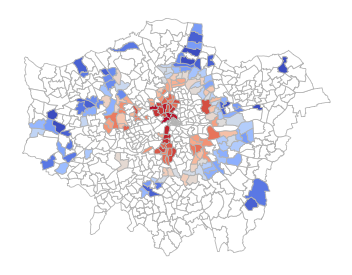

In [21]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.axis('off')
na.plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.7')
data.plot(column=feature, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.7')
fig.tight_layout()
fig.savefig(city+'_'+feature+'.eps', format='eps', dpi=1000)
plt.show()

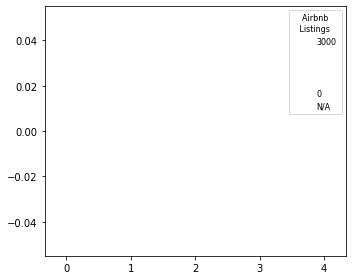

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
plt.rcParams["figure.figsize"] = [5,4]
plt.rcParams['legend.title_fontsize'] = 8
fig, ax = plt.subplots()

index = np.arange(5)
bar_width = 0.25

rects1 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='3000')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='0')
rects4 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='N/A')

ax.legend(title='    Airbnb    \n   Listings   ', prop={'size': 8}, fontsize=8)

fig.tight_layout()

plt.show()
fig.savefig('legend_l.eps', format='eps', dpi=1000)